# Machine Downtime

In [58]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [59]:
data=pd.read_csv('C:/Users/Smile/OneDrive/Documents/Data Science/projects/Machine Downtime.csv')
data.head()

,Date,Machine_ID,Assembly_Line_No,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature(°C),Spindle_Bearing_Temperature(°C),Spindle_Vibration(µm),Tool_Vibration(µm),Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN),Downtime
0,31-12-2021,Makino-L1-Unit1-2013,Shopfloor-L1,71.04,6.933725,6.284965,25.6,46.0,33.4,1.291,26.492,25892.0,335.0,24.055326,3.58,Machine_Failure
1,31-12-2021,Makino-L1-Unit1-2013,Shopfloor-L1,125.33,4.936892,6.196733,35.3,47.4,34.6,1.382,25.274,19856.0,368.0,14.202890,2.68,Machine_Failure
2,31-12-2021,Makino-L3-Unit1-2015,Shopfloor-L3,71.12,6.839413,6.655448,13.1,40.7,33.0,1.319,30.608,19851.0,325.0,24.049267,3.55,Machine_Failure
3,31-05-2022,Makino-L2-Unit1-2015,Shopfloor-L2,139.34,4.574382,6.560394,24.4,44.2,40.6,0.618,30.791,18461.0,360.0,25.860029,3.55,Machine_Failure
4,31-03-2022,Makino-L1-Unit1-2013,Shopfloor-L1,60.51,6.893182,6.141238,4.1,47.3,31.4,0.983,25.516,26526.0,354.0,25.515874,3.55,Machine_Failure


In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Date                             2500 non-null   object 
 1   Machine_ID                       2500 non-null   object 
 2   Assembly_Line_No                 2500 non-null   object 
 3   Hydraulic_Pressure(bar)          2490 non-null   float64
 4   Coolant_Pressure(bar)            2481 non-null   float64
 5   Air_System_Pressure(bar)         2483 non-null   float64
 6   Coolant_Temperature              2488 non-null   float64
 7   Hydraulic_Oil_Temperature(°C)    2484 non-null   float64
 8   Spindle_Bearing_Temperature(°C)  2493 non-null   float64
 9   Spindle_Vibration(µm)            2489 non-null   float64
 10  Tool_Vibration(µm)               2489 non-null   float64
 11  Spindle_Speed(RPM)               2494 non-null   float64
 12  Voltage(volts)      

In [61]:
data.shape

(2500, 16)

In [62]:
data.columns

Index(['Date', 'Machine_ID', 'Assembly_Line_No', 'Hydraulic_Pressure(bar)',
       'Coolant_Pressure(bar)', 'Air_System_Pressure(bar)',
       'Coolant_Temperature', 'Hydraulic_Oil_Temperature(°C)',
       'Spindle_Bearing_Temperature(°C)', 'Spindle_Vibration(µm)',
       'Tool_Vibration(µm)', 'Spindle_Speed(RPM)', 'Voltage(volts)',
       'Torque(Nm)', 'Cutting(kN)', 'Downtime'],
      dtype='object')

In [63]:
data.describe(include='all')

,Date,Machine_ID,Assembly_Line_No,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature(°C),Spindle_Bearing_Temperature(°C),Spindle_Vibration(µm),Tool_Vibration(µm),Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN),Downtime
count,2500,2500,2500,2490.000000,2481.000000,2483.000000,2488.000000,2484.000000,2493.000000,2489.000000,2489.000000,2494.000000,2494.000000,2479.000000,2493.000000,2500
unique,164,3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,15-03-2022,Makino-L1-Unit1-2013,Shopfloor-L1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Machine_Failure
freq,64,874,874,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1265
mean,NaN,NaN,NaN,101.409084,4.947058,6.499275,18.559887,47.618317,35.063698,1.009334,25.411975,20274.792302,348.996792,25.234968,2.782551,NaN
std,NaN,NaN,NaN,30.289301,0.997357,0.407279,8.554480,3.768674,3.764823,0.342898,6.437142,3852.660056,45.376024,6.138564,0.616688,NaN
min,NaN,NaN,NaN,-14.326454,0.325000,5.063480,4.100000,35.200000,22.600000,-0.461000,2.161000,0.000000,202.000000,0.000000,1.800000,NaN
25%,NaN,NaN,NaN,76.355000,4.462464,6.217987,10.400000,45.100000,32.500000,0.777000,21.089000,17919.000000,319.000000,21.666115,2.250000,NaN
50%,NaN,NaN,NaN,96.763486,4.939960,6.505191,21.200000,47.700000,35.100000,1.008000,25.455000,20137.500000,349.000000,24.647736,2.780000,NaN
75%,NaN,NaN,NaN,126.415727,5.518401,6.780550,25.600000,50.100000,37.600000,1.236000,29.790000,22501.750000,380.000000,30.514008,3.270000,NaN


In [64]:
data.isnull().sum()

Date                                0
Machine_ID                          0
Assembly_Line_No                    0
Hydraulic_Pressure(bar)            10
Coolant_Pressure(bar)              19
Air_System_Pressure(bar)           17
Coolant_Temperature                12
Hydraulic_Oil_Temperature(°C)      16
Spindle_Bearing_Temperature(°C)     7
Spindle_Vibration(µm)              11
Tool_Vibration(µm)                 11
Spindle_Speed(RPM)                  6
Voltage(volts)                      6
Torque(Nm)                         21
Cutting(kN)                         7
Downtime                            0
dtype: int64

In [65]:
# Fill null values with mean of the column
data.fillna(data.median(numeric_only = True), inplace =True)

In [66]:
# Convert date column 'datetime' format
data['Date']= pd.to_datetime(data['Date'])

C:\Users\Smile\AppData\Local\Temp\ipykernel_12956\348979178.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Date']= pd.to_datetime(data['Date'])


In [67]:
data.isnull().sum()

Date                               0
Machine_ID                         0
Assembly_Line_No                   0
Hydraulic_Pressure(bar)            0
Coolant_Pressure(bar)              0
Air_System_Pressure(bar)           0
Coolant_Temperature                0
Hydraulic_Oil_Temperature(°C)      0
Spindle_Bearing_Temperature(°C)    0
Spindle_Vibration(µm)              0
Tool_Vibration(µm)                 0
Spindle_Speed(RPM)                 0
Voltage(volts)                     0
Torque(Nm)                         0
Cutting(kN)                        0
Downtime                           0
dtype: int64

In [68]:
# Select the columns for dispersion calculation
columns_to_analyze = ['Hydraulic_Pressure(bar)', 'Coolant_Pressure(bar)', 'Air_System_Pressure(bar)', 'Coolant_Temperature', 'Hydraulic_Oil_Temperature(°C)', 'Spindle_Bearing_Temperature(°C)', 'Spindle_Vibration(µm)', 'Tool_Vibration(µm)', 'Spindle_Speed(RPM)', 'Voltage(volts)', 'Torque(Nm)', 'Cutting(kN)']

# Calculate measures of dispersion for the columns
dispersion_measures = pd.DataFrame({
    'min': data[columns_to_analyze].min(),
    'max': data[columns_to_analyze].max(),
    'std': data[columns_to_analyze].std(),
    'var': data[columns_to_analyze].var(),
 
    'range': data[columns_to_analyze].max() - data[columns_to_analyze].min()
})

# Print the dispersion measures
print(dispersion_measures)

                                        min           max          std  \
Hydraulic_Pressure(bar)          -14.326454    191.000000    30.230060   
Coolant_Pressure(bar)              0.325000     11.350000     0.993559   
Air_System_Pressure(bar)           5.063480      7.973992     0.405892   
Coolant_Temperature                4.100000     98.200000     8.535867   
Hydraulic_Oil_Temperature(°C)     35.200000     61.400000     3.756596   
Spindle_Bearing_Temperature(°C)   22.600000     49.500000     3.759547   
Spindle_Vibration(µm)             -0.461000      2.000000     0.342143   
Tool_Vibration(µm)                 2.161000     45.726000     6.422959   
Spindle_Speed(RPM)                 0.000000  27957.000000  3848.038101   
Voltage(volts)                   202.000000    479.000000    45.321518   
Torque(Nm)                         0.000000     55.552400     6.112952   
Cutting(kN)                        1.800000      3.930000     0.615824   

                                     

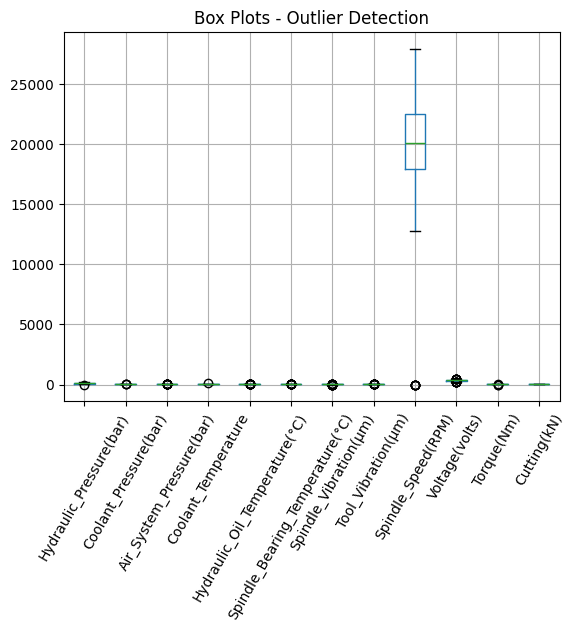

In [69]:
# Select the columns for outlier detection
columns_to_analyze = ['Hydraulic_Pressure(bar)', 'Coolant_Pressure(bar)', 'Air_System_Pressure(bar)', 'Coolant_Temperature', 'Hydraulic_Oil_Temperature(°C)', 'Spindle_Bearing_Temperature(°C)', 'Spindle_Vibration(µm)', 'Tool_Vibration(µm)', 'Spindle_Speed(RPM)', 'Voltage(volts)', 'Torque(Nm)', 'Cutting(kN)']


# Create box plots for outlier detection
data[columns_to_analyze].boxplot()
plt.xticks(rotation=60)
plt.title('Box Plots - Outlier Detection')
plt.show()

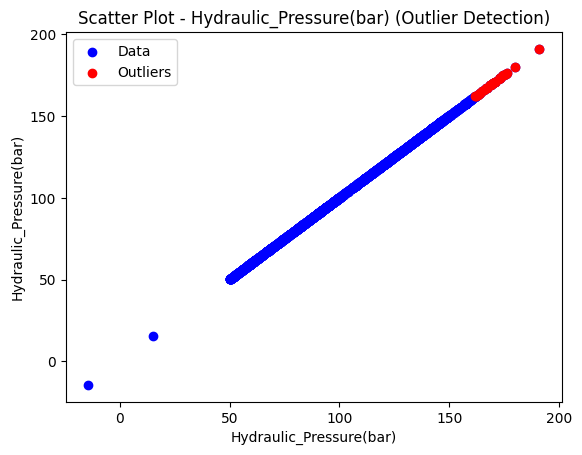

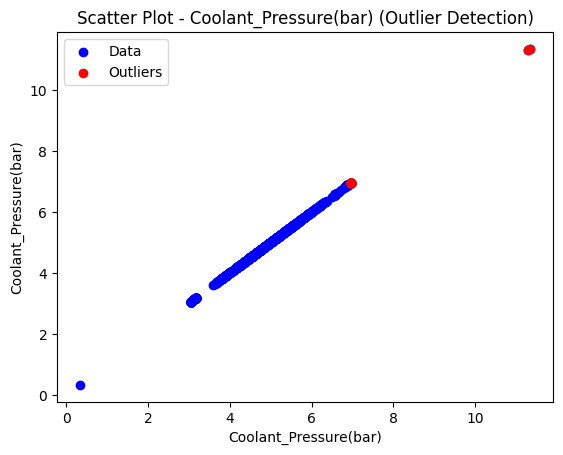

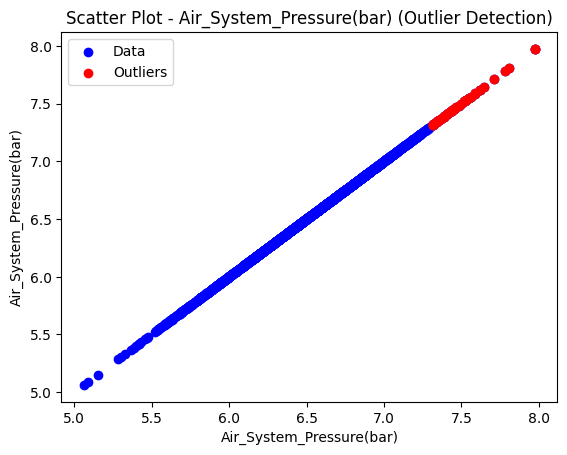

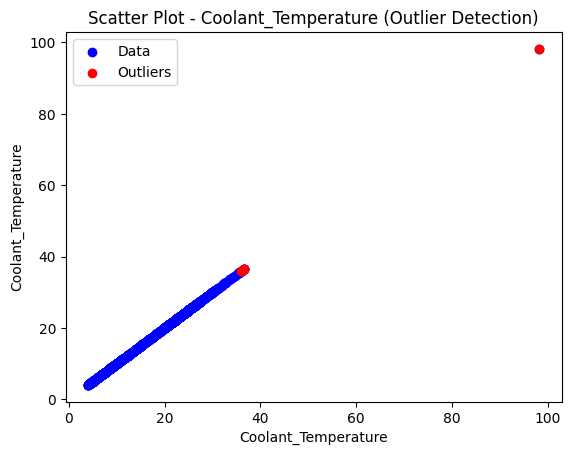

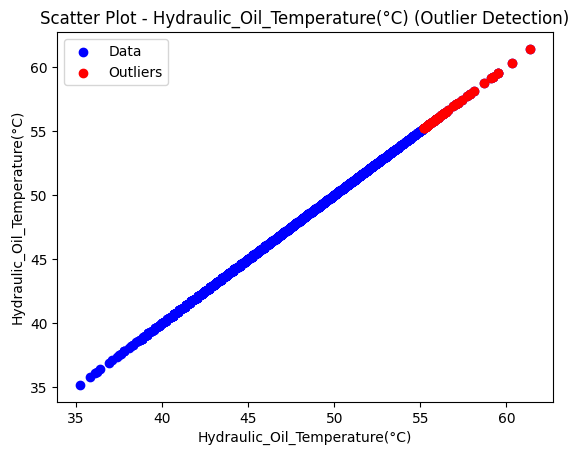

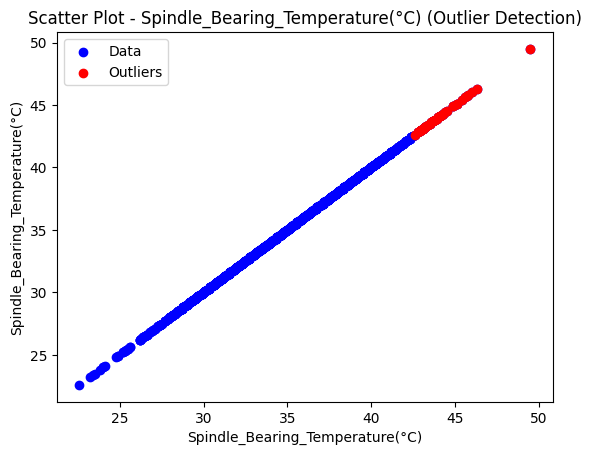

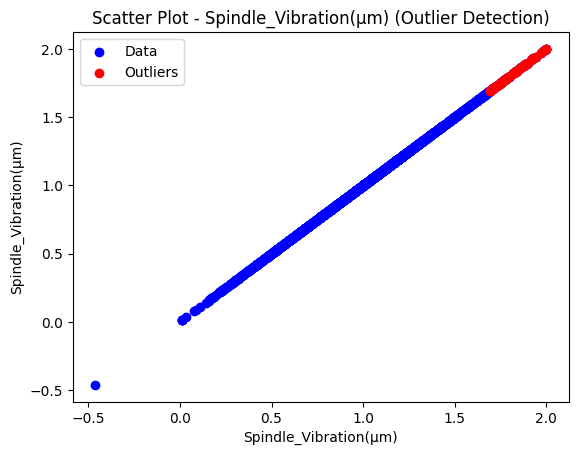

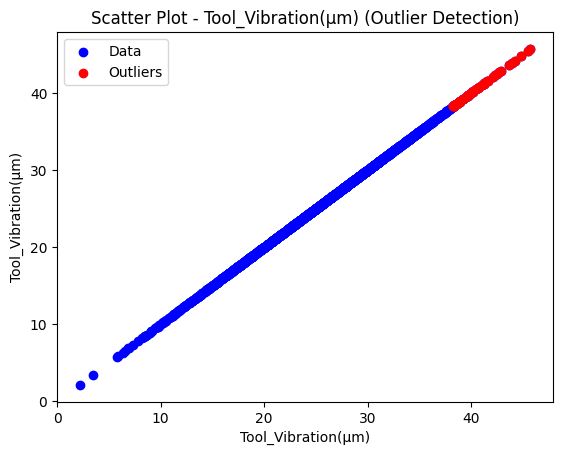

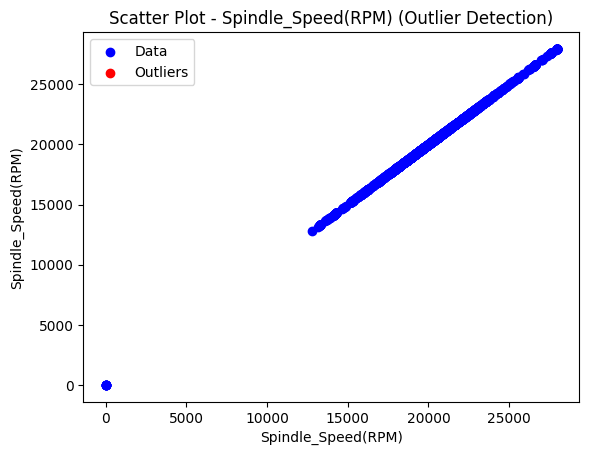

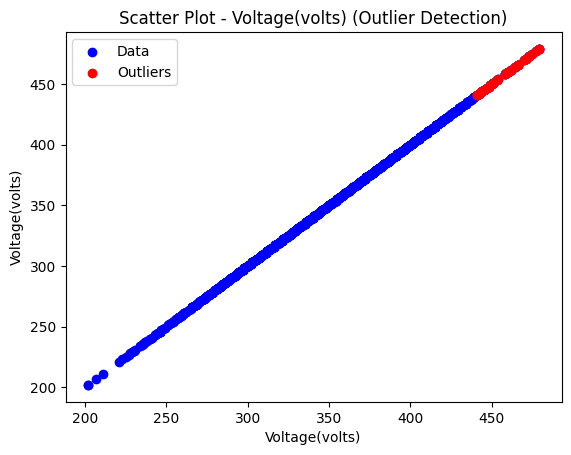

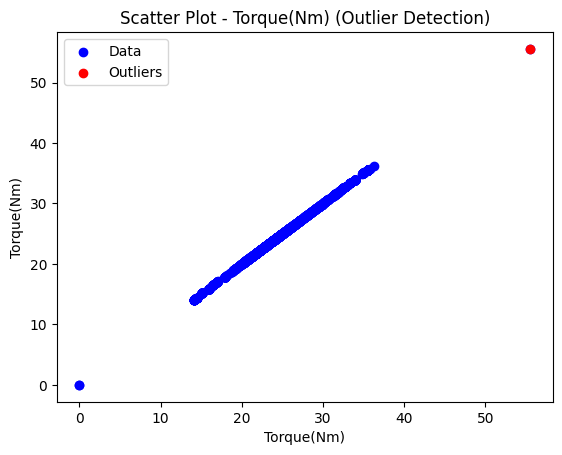

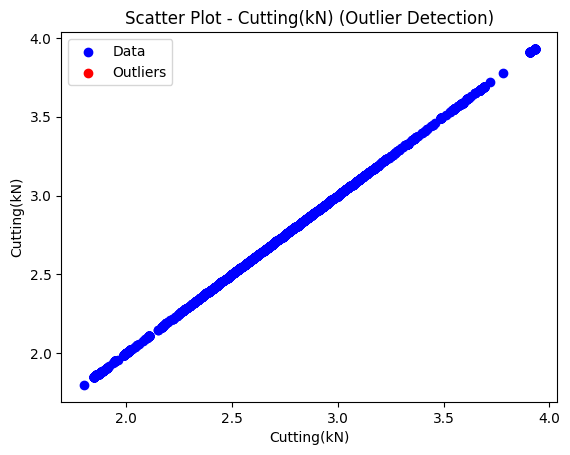

In [70]:
# Set the matplotlib backend to display inline
%matplotlib inline

# Create scatter plots for outlier detection
for column in columns_to_analyze:
    plt.scatter(data[column], data[column], c='blue', label='Data')
    
    # Identify outliers and change their color to red
    outliers = data[column].loc[data[column] > data[column].mean() + 2 * data[column].std()]
    plt.scatter(outliers, outliers, c='red', label='Outliers')
    
    plt.xlabel(column)
    plt.ylabel(column)
    plt.title(f'Scatter Plot - {column} (Outlier Detection)')
    plt.legend()
    plt.show()

In [71]:
column_corr = data.corr(numeric_only = True)
print("Correlation of Columns :")
print(column_corr)

Correlation of Columns :
                                 Hydraulic_Pressure(bar)  \
Hydraulic_Pressure(bar)                         1.000000   
Coolant_Pressure(bar)                          -0.074172   
Air_System_Pressure(bar)                       -0.029626   
Coolant_Temperature                            -0.110024   
Hydraulic_Oil_Temperature(°C)                   0.008757   
Spindle_Bearing_Temperature(°C)                 0.022682   
Spindle_Vibration(µm)                          -0.006549   
Tool_Vibration(µm)                              0.020717   
Spindle_Speed(RPM)                             -0.119812   
Voltage(volts)                                 -0.004094   
Torque(Nm)                                      0.161633   
Cutting(kN)                                    -0.221135   

                                 Coolant_Pressure(bar)  \
Hydraulic_Pressure(bar)                      -0.074172   
Coolant_Pressure(bar)                         1.000000   
Air_System_Pressure(

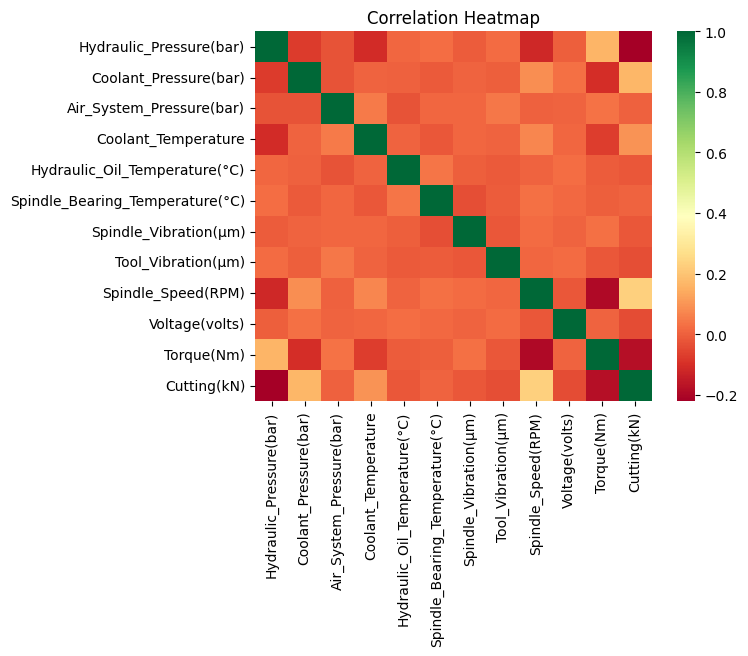

In [72]:
%matplotlib inline

# Create the heatmap with color scheme
sns.heatmap(column_corr, cmap='RdYlGn', xticklabels=column_corr.columns, yticklabels=column_corr.columns)
plt.title('Correlation Heatmap')
plt.show()

In [73]:
skewness=data.skew(numeric_only=True)
print(skewness)

Hydraulic_Pressure(bar)            0.199274
Coolant_Pressure(bar)              0.147806
Air_System_Pressure(bar)          -0.053378
Coolant_Temperature                0.104172
Hydraulic_Oil_Temperature(°C)     -0.002716
Spindle_Bearing_Temperature(°C)   -0.036074
Spindle_Vibration(µm)              0.001587
Tool_Vibration(µm)                -0.061228
Spindle_Speed(RPM)                -0.172424
Voltage(volts)                    -0.028693
Torque(Nm)                         0.033119
Cutting(kN)                        0.114157
dtype: float64


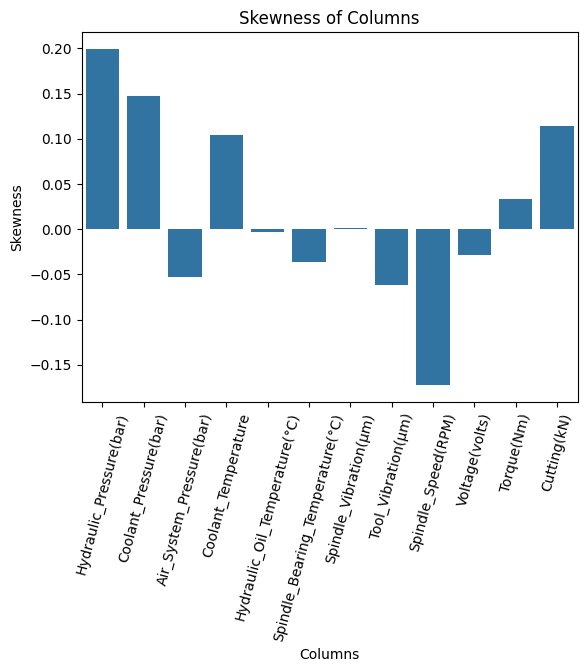

In [74]:
%matplotlib inline

# Create a bar plot of skewness
sns.barplot(x=skewness.index, y=skewness.values)
plt.xticks(rotation=75)
plt.xlabel('Columns')
plt.ylabel('Skewness')
plt.title('Skewness of Columns')
plt.show()

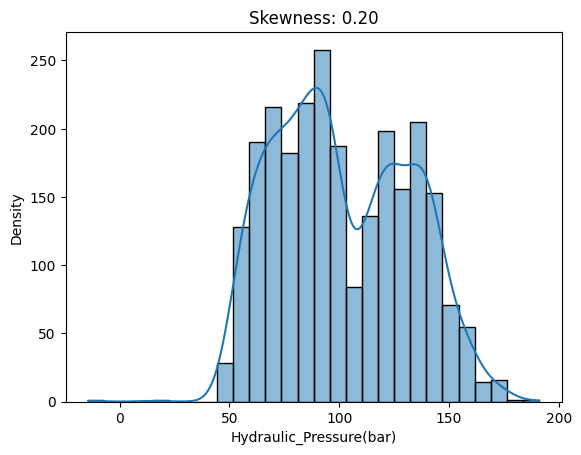

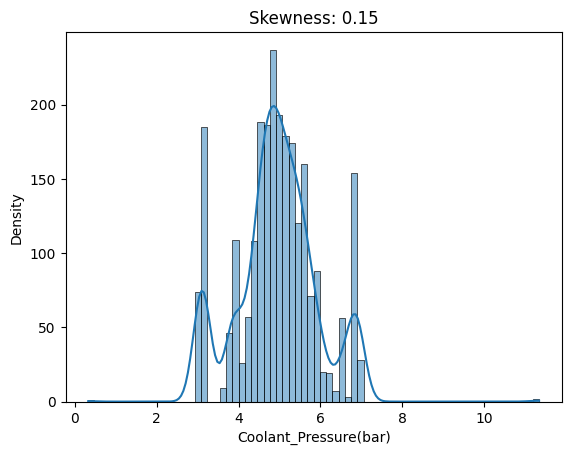

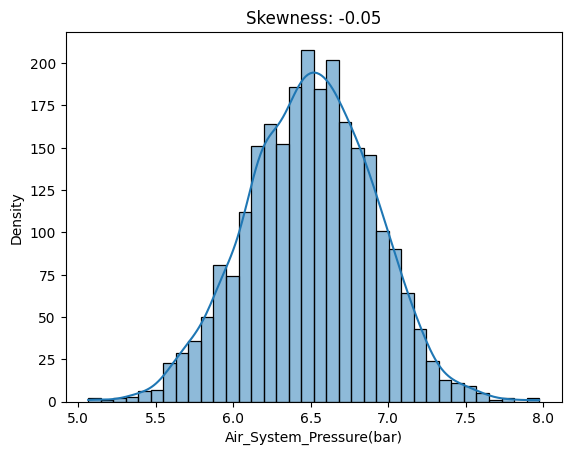

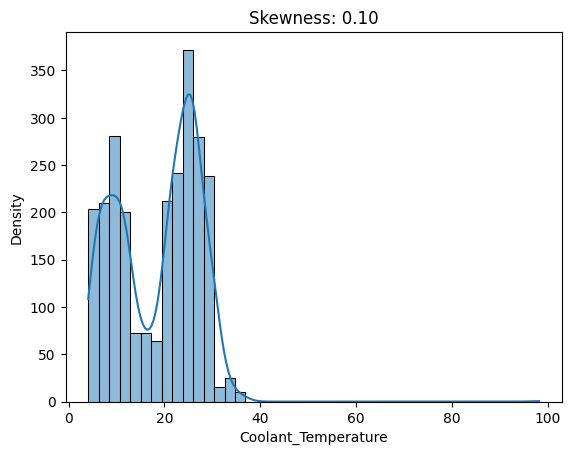

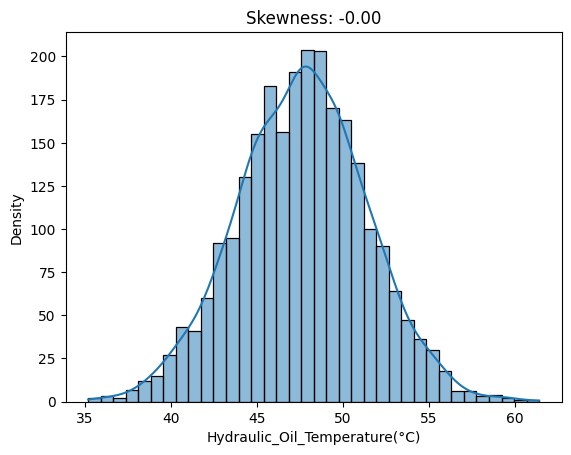

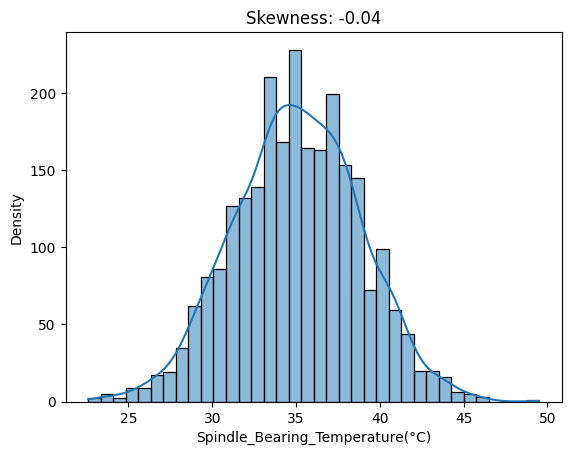

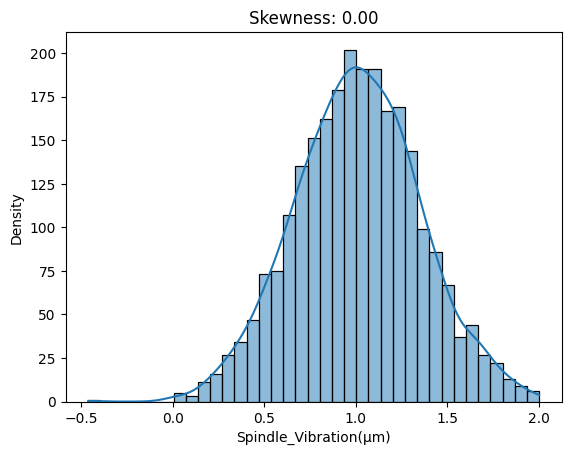

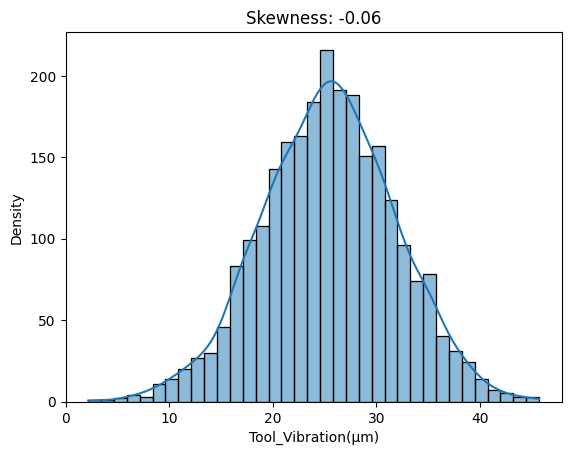

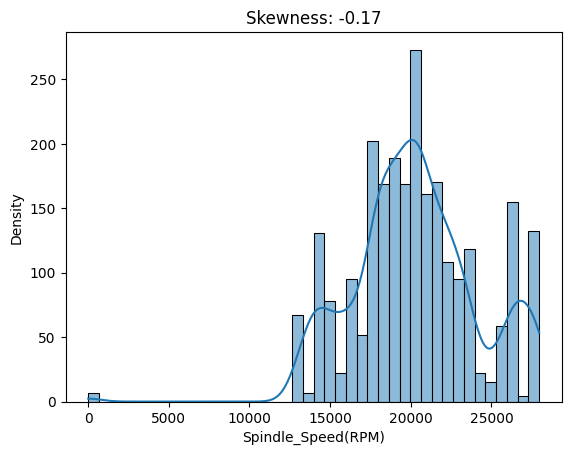

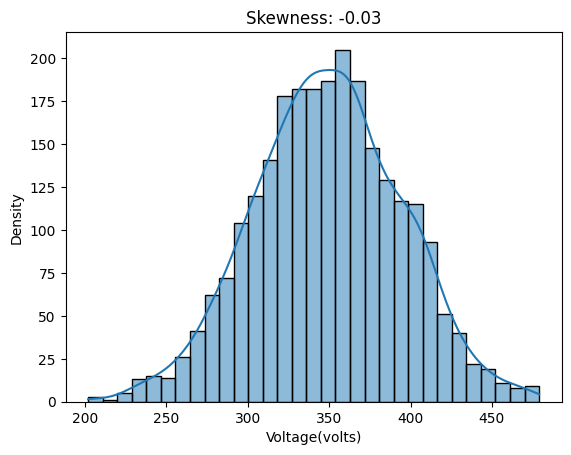

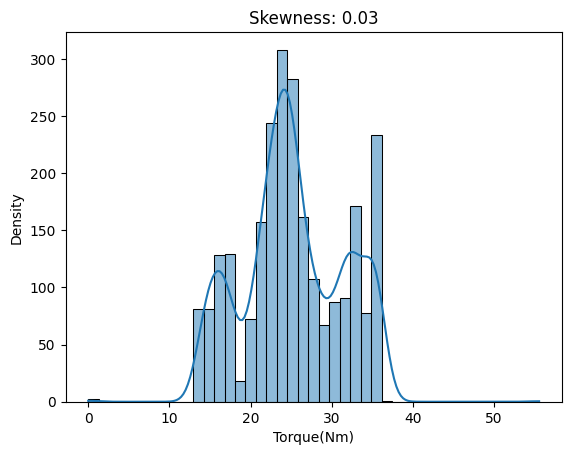

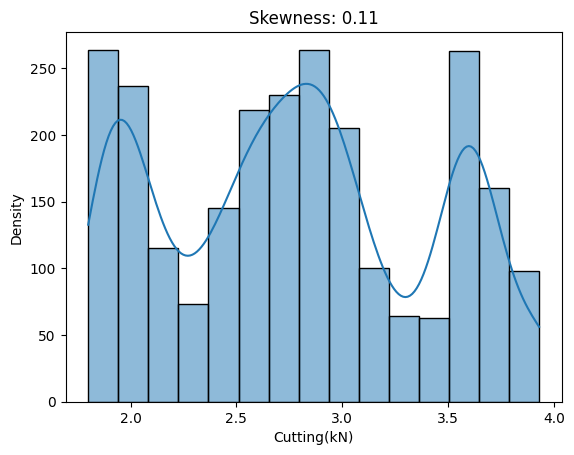

In [75]:
for column in columns_to_analyze:
  plt.figure()
  sns.histplot(data=data, x=column, kde=True)
  plt.xlabel(column)
  plt.ylabel('Density')
  plt.title(f'Skewness: {skewness[column]:.2f}')
  plt.show()

In [76]:
# Calculate the kurtosis for each column
kurtosis_values = data.kurtosis(numeric_only = True)
print(kurtosis_values)

Hydraulic_Pressure(bar)           -0.911830
Coolant_Pressure(bar)              1.201405
Air_System_Pressure(bar)           0.018971
Coolant_Temperature                1.581860
Hydraulic_Oil_Temperature(°C)      0.057724
Spindle_Bearing_Temperature(°C)   -0.035556
Spindle_Vibration(µm)             -0.005537
Tool_Vibration(µm)                 0.019749
Spindle_Speed(RPM)                 1.355132
Voltage(volts)                    -0.083325
Torque(Nm)                        -0.444431
Cutting(kN)                       -1.081785
dtype: float64


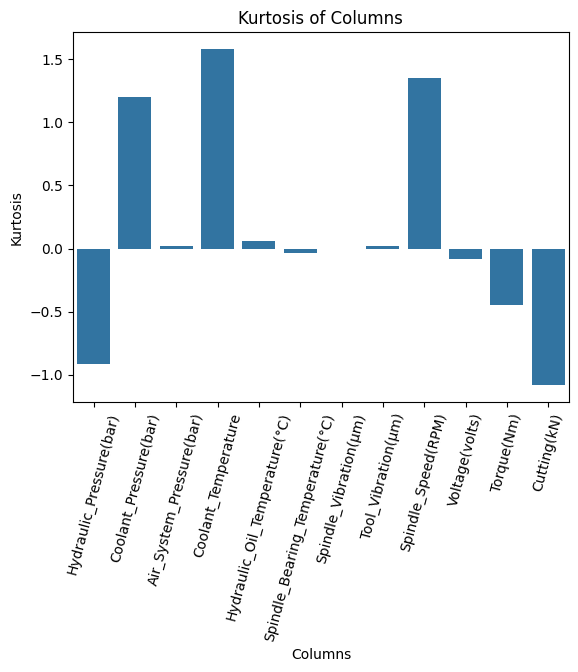

In [77]:
# Create a bar plot of kurtosis
sns.barplot(x=kurtosis_values.index, y=kurtosis_values.values)
plt.xticks(rotation=75)
plt.xlabel('Columns')
plt.ylabel('Kurtosis')
plt.title('Kurtosis of Columns')
plt.show()

In [78]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Downtime']=le.fit_transform(data['Downtime'])

In [79]:
data.head()

,Date,Machine_ID,Assembly_Line_No,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature(°C),Spindle_Bearing_Temperature(°C),Spindle_Vibration(µm),Tool_Vibration(µm),Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN),Downtime
0,2021-12-31,Makino-L1-Unit1-2013,Shopfloor-L1,71.04,6.933725,6.284965,25.6,46.0,33.4,1.291,26.492,25892.0,335.0,24.055326,3.58,0
1,2021-12-31,Makino-L1-Unit1-2013,Shopfloor-L1,125.33,4.936892,6.196733,35.3,47.4,34.6,1.382,25.274,19856.0,368.0,14.202890,2.68,0
2,2021-12-31,Makino-L3-Unit1-2015,Shopfloor-L3,71.12,6.839413,6.655448,13.1,40.7,33.0,1.319,30.608,19851.0,325.0,24.049267,3.55,0
3,2022-05-31,Makino-L2-Unit1-2015,Shopfloor-L2,139.34,4.574382,6.560394,24.4,44.2,40.6,0.618,30.791,18461.0,360.0,25.860029,3.55,0
4,2022-03-31,Makino-L1-Unit1-2013,Shopfloor-L1,60.51,6.893182,6.141238,4.1,47.3,31.4,0.983,25.516,26526.0,354.0,25.515874,3.55,0


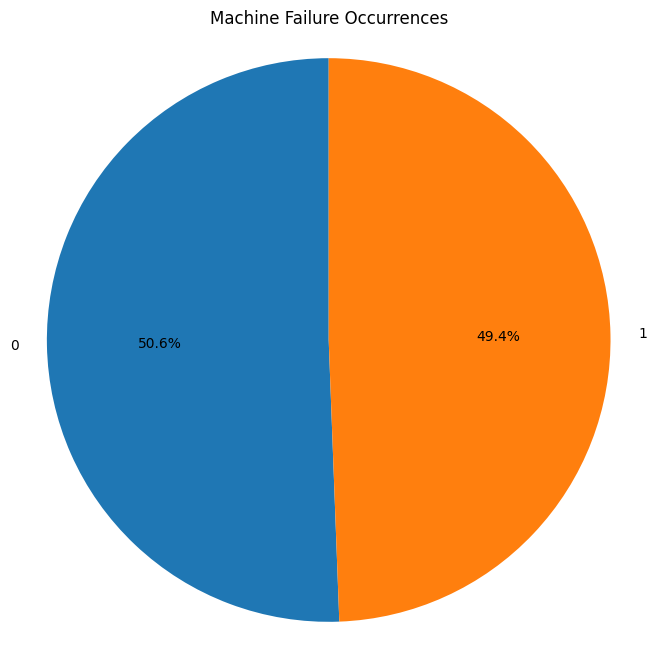

In [80]:
# Count the occurrences of machine failure
failure_counts = data['Downtime'].value_counts()

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(failure_counts, labels=failure_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Machine Failure Occurrences')
plt.axis('equal')
plt.show()

In [81]:
machine_downtime_counts  = data[(data.Downtime ==0)]

In [82]:
machine_downtime_counts

,Date,Machine_ID,Assembly_Line_No,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature(°C),Spindle_Bearing_Temperature(°C),Spindle_Vibration(µm),Tool_Vibration(µm),Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN),Downtime
0,2021-12-31,Makino-L1-Unit1-2013,Shopfloor-L1,71.04,6.933725,6.284965,25.6,46.0,33.4,1.291,26.492,25892.0,335.0,24.055326,3.58,0
1,2021-12-31,Makino-L1-Unit1-2013,Shopfloor-L1,125.33,4.936892,6.196733,35.3,47.4,34.6,1.382,25.274,19856.0,368.0,14.202890,2.68,0
2,2021-12-31,Makino-L3-Unit1-2015,Shopfloor-L3,71.12,6.839413,6.655448,13.1,40.7,33.0,1.319,30.608,19851.0,325.0,24.049267,3.55,0
3,2022-05-31,Makino-L2-Unit1-2015,Shopfloor-L2,139.34,4.574382,6.560394,24.4,44.2,40.6,0.618,30.791,18461.0,360.0,25.860029,3.55,0
4,2022-03-31,Makino-L1-Unit1-2013,Shopfloor-L1,60.51,6.893182,6.141238,4.1,47.3,31.4,0.983,25.516,26526.0,354.0,25.515874,3.55,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2489,2022-02-01,Makino-L1-Unit1-2013,Shopfloor-L1,137.37,4.851332,6.336146,28.7,49.0,35.9,0.231,23.023,19573.0,307.0,15.900716,2.63,0
2490,2022-02-01,Makino-L1-Unit1-2013,Shopfloor-L1,55.54,4.841605,6.852283,26.4,42.9,36.2,1.436,24.819,26526.0,348.0,15.119739,2.53,0
2491,2022-02-01,Makino-L2-Unit1-2015,Shopfloor-L2,90.53,6.839413,5.698765,9.4,52.5,40.9,1.271,31.573,27613.0,377.0,16.964105,3.67,0
2492,2022-02-01,Makino-L1-Unit1-2013,Shopfloor-L1,137.37,4.842521,6.136585,21.5,49.6,42.3,0.432,37.423,19536.0,402.0,24.437039,2.84,0


In [83]:
mdc = machine_downtime_counts.groupby('Date')['Downtime'].count()

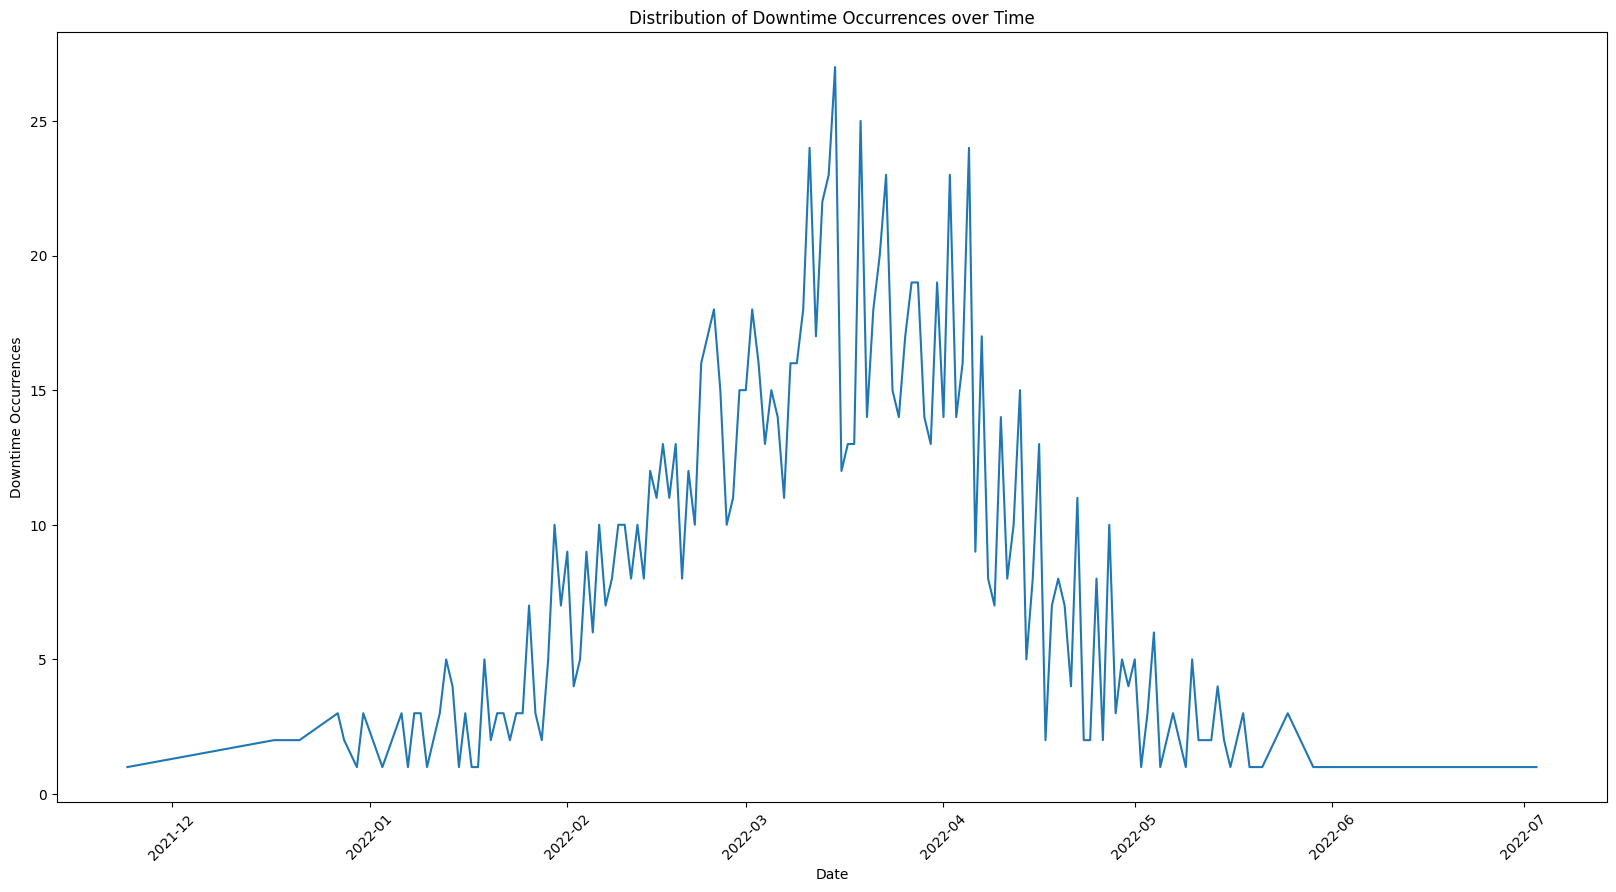

In [84]:
plt.figure(figsize=(20, 10))
plt.plot(mdc.index,mdc.values)
plt.xlabel('Date')
plt.ylabel('Downtime Occurrences')
plt.title('Distribution of Downtime Occurrences over Time')
plt.xticks(rotation=45)
plt.show()

In [85]:
mdc_mid = machine_downtime_counts.groupby('Machine_ID')['Downtime'].count()
mdc_mid

Machine_ID
Makino-L1-Unit1-2013    454
Makino-L2-Unit1-2015    396
Makino-L3-Unit1-2015    415
Name: Downtime, dtype: int64

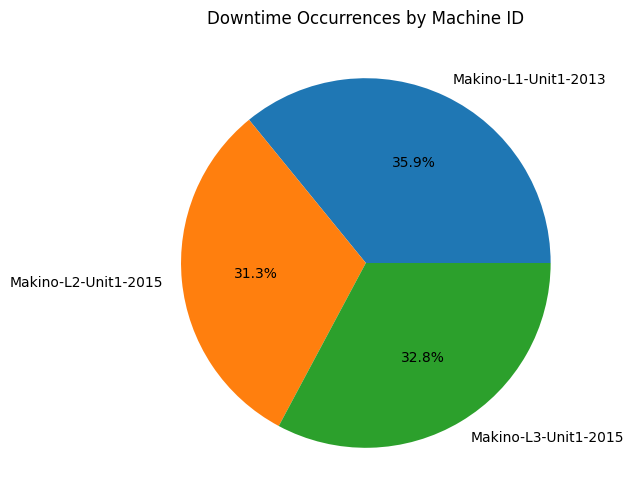

In [86]:
# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(mdc_mid, labels=mdc_mid.index, autopct='%1.1f%%')
plt.title('Downtime Occurrences by Machine ID')
plt.show()

In [87]:
mdc_malno = machine_downtime_counts.groupby('Assembly_Line_No')['Downtime'].count()
mdc_malno

Assembly_Line_No
Shopfloor-L1    454
Shopfloor-L2    396
Shopfloor-L3    415
Name: Downtime, dtype: int64

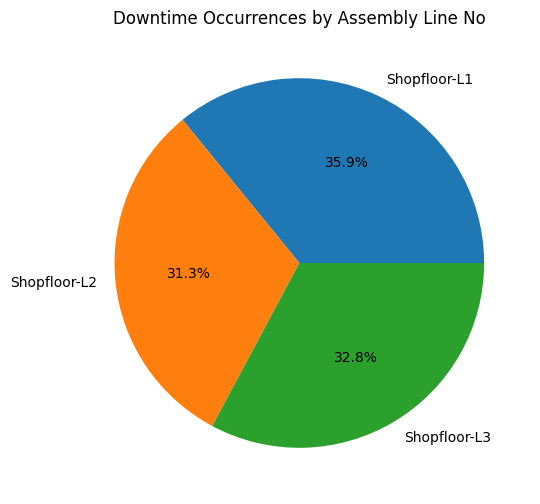

In [88]:
plt.figure(figsize=(6, 6))
plt.pie(mdc_malno, labels=mdc_malno.index, autopct='%1.1f%%')
plt.title('Downtime Occurrences by Assembly Line No')
plt.show()

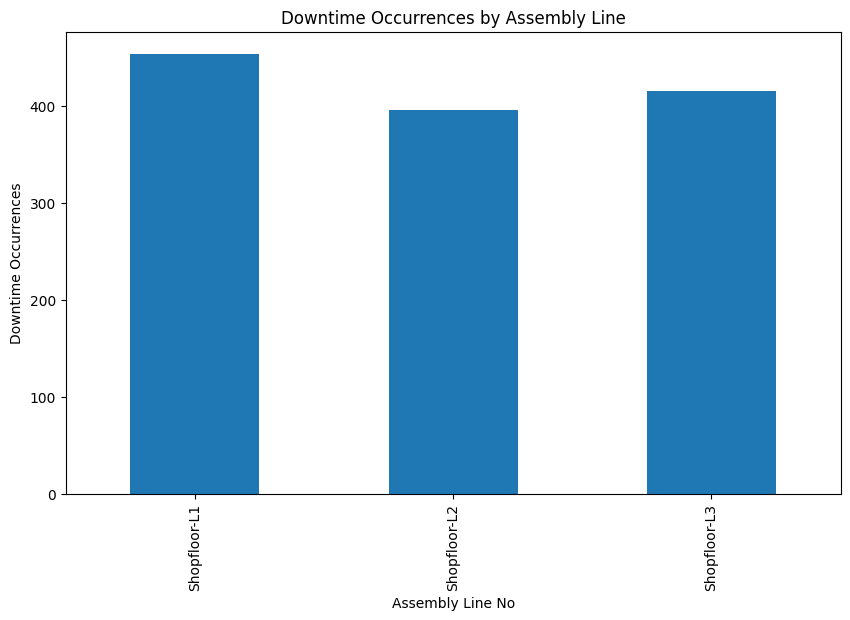

In [89]:
# Plot the downtime occurrences by assembly line
plt.figure(figsize=(10, 6))
mdc_malno.plot(kind='bar')
plt.xlabel('Assembly Line No')
plt.ylabel('Downtime Occurrences')
plt.title('Downtime Occurrences by Assembly Line')
plt.show()

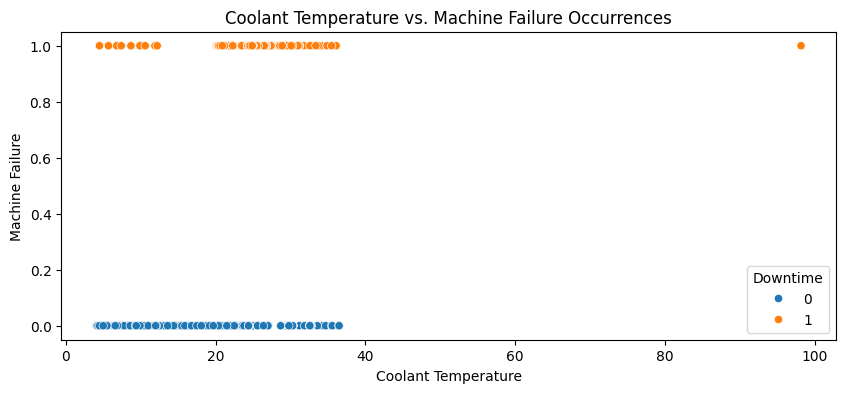

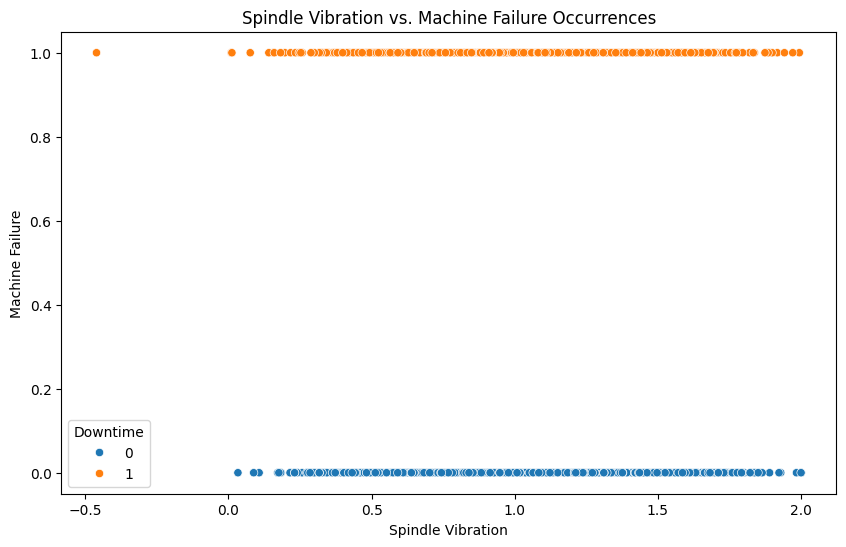

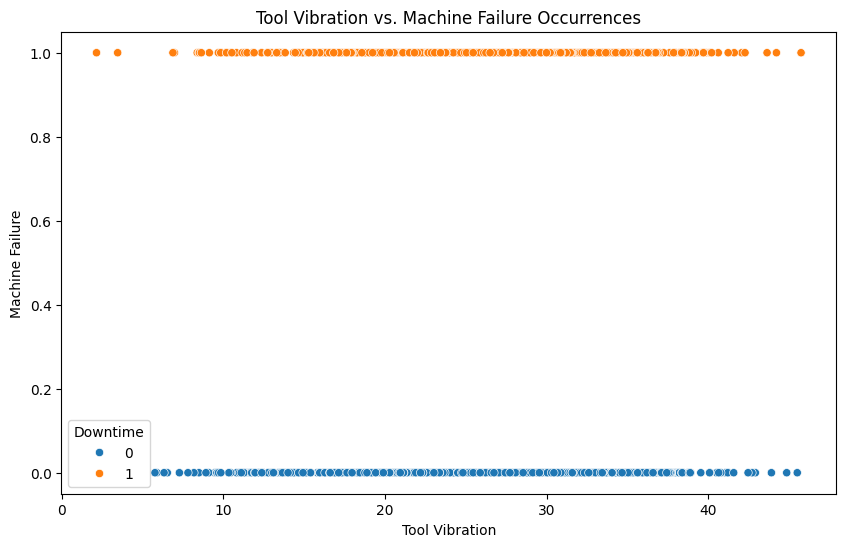

In [90]:
# Scatter plot of coolant temperature vs. machine failure occurrences
plt.figure(figsize=(10,4))
sns.scatterplot(data=data, x='Coolant_Temperature', y='Downtime', hue='Downtime')
plt.xlabel('Coolant Temperature')
plt.ylabel('Machine Failure')
plt.title('Coolant Temperature vs. Machine Failure Occurrences')
plt.show()


# Scatter plot of spindle vibration vs. machine failure occurrences
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Spindle_Vibration(µm)', y='Downtime', hue='Downtime')
plt.xlabel('Spindle Vibration')
plt.ylabel('Machine Failure')
plt.title('Spindle Vibration vs. Machine Failure Occurrences')
plt.show()

# Scatter plot of tool vibration vs. machine failure occurrences
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Tool_Vibration(µm)', y='Downtime', hue='Downtime')
plt.xlabel('Tool Vibration')
plt.ylabel('Machine Failure')
plt.title('Tool Vibration vs. Machine Failure Occurrences')
plt.show()

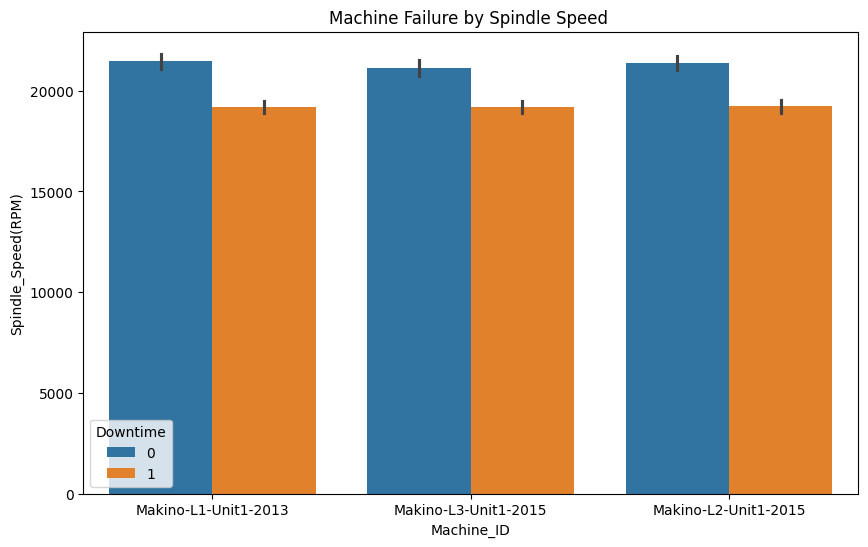

In [91]:
plt.figure(figsize=(10,6))
sns.barplot( x= 'Machine_ID', y  ='Spindle_Speed(RPM)', data = data, hue ='Downtime')
plt.title("Machine Failure by Spindle Speed ")
plt.show()